##### ΑΡΙΣΤΟΤΕΛΕΙΟ ΠΑΝΕΠΙΣΤΗΜΙΟ ΘΕΣΣΑΛΟΝΙΚΗΣ
##### ΠΟΛΥΤΕΧΝΙΚΗ ΣΧΟΛΗ - ΤΜΗΜΑ ΗΛΕΚΤΡΟΛΟΓΩΝ ΜΗΧΑΝΙΚΩΝ ΚΑΙ ΜΗΧΑΝΙΚΩΝ ΥΠΟΛΟΓΙΣΤΩΝ  
##### ΤΟΜΕΑΣ ΗΛΕΚΤΡΟΝΙΚΗΣ ΚΑΙ ΥΠΟΛΟΓΙΣΤΩΝ   

---
   
# **ΕΠΙΧΕΙΡΗΣΙΑΚΗ ΕΡΕΥΝΑ** (078)     

---

## **Εργασία / Project 2023**
### Αυτοκίνηση Α.Ε.  

---

### **ΠΡΟΣΩΠΙΚΑ ΣΤΟΙΧΕΙΑ**   
- **Ονομ/νυμο**: Κυπαρίσσης Κυπαρίσσης   
- **Α.Ε.Μ.**: 10346   
- **E-mail**: [kyparkypar@ece.auth.gr](mailto:kyparkypar@ece.auth.gr)   

---

##### 2 Ιουνίου 2023

---

## **ΕΙΣΑΓΩΓΙΚΑ**
#### **Libraries**
Τα παρακάτω ζητούμενα της εργασίας θα υλοποιηθούν και θα επιλυθούν μέσω του $ \texttt{Gurobi Optimization for Python}^{[1]} $, το οποίο είναι μια βιβλιοθήκη λογισμικού μαθηματικής βελτιστοποίησης, για την γλώσσα προγραμματισμού $ \texttt{Python 3} $, για την επίλυση προβλημάτων βελτιστοποίησης:

In [ ]:
%%capture
!pip install gurobipy

In [ ]:
import gurobipy as gp
from gurobipy import GRB

ενώ οι υπόλοιπες βιβλιοθήκες που χρησιμοποιούνται βοηθητικά είναι οι:

In [ ]:
%%capture
!pip install matplotlib
!pip install pandas
!pip install math

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math

---
## **Ερώτημα 1o**
### **Προγραμματισμός Κατασκευής Εξαρτημάτων**

#### **Μοντελοποιήση προβλήματος**

Το πρόβλημα αυτό μπορεί να μοντελοποιηθεί ως ένα **Flow-shop scheduling** πρόβλημα, καθώς κάθε εξάρτημα πρέπει να περάσει από κάθε διαδικασία με την σειρά, χωρίς να μπορεί αγνοηθεί κάποιο εξάρτημα. Έτσι μπορούμε να ορίσουμε ένα πρόγραμμα/schedule για την αρχική σείρα των εξαρτημάτων.

Αρχικά, ορίζουμε τα παρακάτω σύνολα/sets:

*   $ Μ = \{1, 2, 3\} $, το οποίο είναι το σύνολο των διαδικασιών/processes που πρέπει να πραγματοποιηθούν (ή μηχανών/machines), όπου:
    *   Η τιμή 1 αντιστοιχεί στην διαδικασία της χύτευσης/casting
    *   Η τιμή 2 αντιστοιχεί στην διαδικασία της λείανσης/grinding
    *   Η τιμή 3 αντιστοιχεί στην διαδικασία της σύνδεσης/assembling   


*   $ J = \{1, 2, 3, 4, 5, 6 \}$, το οποίο είναι το σύνολο των εξαρτημάτων/components (ή jobs) που πρέπει να κατασκευαστούν

Έστω $t_{m,j}$ ο χρόνος επεξεργασίας (ώρες) του εξαρτήματος j στη μηχανή/διαδικασία m, με τις τιμές του να δίνονται από τον $\text{πίνακα 1}$ της εκφώνησης.

Ορίζουμε την δυαδική μεταβλητή απόφασης:

$$
    rank_{j,k} = \left\{\begin{array}{ll}
        1, & \textsf{ανν το εξάρτημα } j \textsf{ έχει θέση } k \textsf{ στην σειρά κατασκευής των εξαρτημάτων}\\
        0, & \textsf{αλλιώς}
        \end{array}\right.
$$

, προφανώς με:

$$
    rank_{j,k} \in \{0, 1\}, \quad \forall j \in J,~~\forall k \in RANKS \tag{1}
$$

, με το σύνολο/set θέσεων εκκίνησης να είναι το $ RANKS = \{1, 2, 3, 4, 5, 6\} $, το οποίο παρατηρούμε ότι ταυτίζεται με το σύνολο των jobs/εξαρτημάτων, καθώς κάθε εξάρτημα/job πρέπει να αντιστοιχηθεί σε ένα rank. Έτσι προκύπτει και ο περιορισμός:

$$
    \sum_{j = 1}^{6}rank_{j,k} = 1, \quad \forall k \in RANKS \tag{2}
$$

Επίσης, αφού προφανώς κάθε θέση στην σείρα κατασκευής (rank) πρέπει να έχει μόνο ένα εξάρτημα/job, προκύπτει και ο περιορισμός:

$$
    \sum_{k = 1}^{6}rank_{j,k} = 1, \quad \forall j \in J \tag{3}
$$

Για τον υπολογισμό των χρονικών στιγμών εκκίνησης και ολοκλήρωσης των διαδικασιών, είσαγουμε αρχικά την μεταβλητή απόφασης $ empty_{m,k} $, που αντιστοιχεί στο χρονικό διάστημα που η μηχανή/διαδικασία $m$ μένει σε αδράνεια μετά τον τερματισμό της επεξεργασία του εξαρτήματος με θέση/rank $k$ στην σειρά κατασκευής των εξαρτημάτων και πρίν την αρχή της επεξεργασίας του εξαρτήματος με θέση/rank $k + 1$. Έτσι προκύπτει και ο περιορισμός:

$$
    empty_{m,k} \geq 0, \quad \forall m \in M,~~\forall k = 1, 2, 3, 4, 5 \tag{4}
$$

Επείδη, όμως προφανώς, θέλουμε τα εξαρτήματα να επεξεργάζονται χωρίς παύσεις στην πρώτη μηχανή/διαδικασία (με $m = 1$), η οποία δεν χρείαζεται να περιμένει ή και να εξαρτάται από τις υπόλοιπες μηχανές, τότε είναι:

$$
    empty_{1,k} = 0, \quad \forall k = 1, 2, 3, 4, 5 \tag{5}
$$

Στην συνέχεια, εισάγουμε και την μεταβλήτη απόφασης $ wait_{m,k} $, που αντιστοιχεί στον χρόνο αναμονής του εξαρτήματος/job, με θέση/rank $k$ στην σειρά κατασκευής των εξαρτημάτων, μεταξύ των διαδικασίων $m$ και $m + 1$. Έτσι προκύπτει και ο περιορισμός:

$$
    wait_{m,k} \geq 0, \quad \forall m = 1, 2,~~\forall k \in RANKS \tag{6}
$$

Επειδή, όμως προφανώς, το πρώτο εξάρτημα στην σειρά κατασκευής των εξαρτημάτων (με $k = 1$) μπορεί να περάσει από όλες τις διαδικασίες/μηχανές χωρίς να χρειαστεί να περιμένει κάθως αποκλείεται να συναντήσει άλλο εξάρτημα μπροστά του, είναι:

$$
    wait_{m,1} = 0, \quad \forall m = 1, 2 \tag{7}
$$

Μένει τώρα να συνδέσουμε τις μεταβλητές απόφασης $wait_{m,k}$ και $empty_{m,k}$ με τις μεταβλητές $rank_{j,k}$, λαμβάνοντας υποψή τον χρόνο μεταξύ της ολοκλήρωσης της διαδικασίας $m$ για το εξάρτημα $k$ και της εκκίνησης της διαδικασίας $m + 1$ για το εξάρτημα $k + 1$. Έτσι είναι:

$$
    \begin{align*}
        & empty_{m,k} + \sum_{j = 1}^{6}t_{m,j}\cdot rank_{j,k+1} + wait_{m,k+1} = \ldots \nonumber \\
        & \qquad\ldots = wait_{m,k} + \sum_{j = 1}^{6}t_{m+1,j}\cdot rank_{j,k} + empty_{m+1,k}, \nonumber \\ & \qquad\ldots ~\forall m = 1,2,~~\forall k = 1,2,3,4,5 \nonumber \\
    \end{align*}\tag{8}
$$

(Η παραπάνω εξίσωση θα γινόταν καλύτερα αντιληπτή με ένα σχήμα. Όμως, δεν καταφέραμε να το δημιουργήσουμε και συνεπώς δεν υπάρχει στην αναφορά αυτή.)

Στόχος, άρα, είναι να ελαχιστοποιηθεί ο συνολικός χρόνος κατασκευής όλων των εξαρτημάτων, ο οποίος ταυτίζεται με την χρονική στιγμή που η τελειώνει η επεξεργασία του τελευταίου εξαρτήματος/job από την διαδικασία της σύνδεσης (ή από την μηχανή/διαδικασία 3). Έτσι, η αντικειμενική συνάρτηση είναι:

$$
    \min \left( \sum_{m = 1}^{2}\sum_{j = 1}^{6}t_{m,j}\cdot rank_{j,1} + \sum_{k = 1}^{5}empty_{3,k} + \sum_{j = 1}^{6}t_{3,j} \right) \tag{9}
$$

, με το πρώτο άθροισμα να δίνει την χρονική στιγμή που η ξεκινάει να δουλεύει η μηχανή/ διαδικασία της σύνδεσης, η οποία ισούται με τον συνολικό χρόνο που χρειάζεται να κάνει το πρώτο εξάρτημα, στην σείρα κατασκευής, στις δύο προηγούμενες διαδικασίες (της χύτευσης και της λείανσης). 

Το δεύτερο άθροισμα δίνει το συνολικό χρονικό διάστημα που η μηχανή της διαδικασίας της σύνδεσης παραμένει σε αδράνεια. 

To τρίτο άθροισμα δίνει το άθροισμα των διαρκειών όλων των διαδικασίων σύνδεσης, στην μηχανή 3, όλων των εξαρτημάτων. 
Παρόλο αυτά, επειδή το τελευταίο άθροισμα είναι σταθερό, μπορεί να παραλειφθεί και έτσι η αντικειμενική συνάρτηση $(9)$ γίνεται:

$$
    (9) \Rightarrow \min \left( \sum_{m = 1}^{2}\sum_{j = 1}^{6}t_{m,j}\cdot rank_{j,1} + \sum_{k = 1}^{5}empty_{3,k} \right) \tag{10}
$$

Συνοπτικά, μέσω των περιορισμών/constraints $(1), (2), (3), (4), (5), (6), (7), (8)$, και μέσω της αντικειμενικής συνάρτησης $(10)$ έχουμε τo πρόβλημα ελαχιστοποίησης υπό περιορισμόυς:

$$ 
\begin{align}
\min \quad  & \left( \sum_{m = 1}^{2}\sum_{j = 1}^{6}t_{m,j}\cdot rank_{j,1} + \sum_{k = 1}^{5}empty_{3,k} \right) \nonumber \\
\textrm{s.t.:} \quad & rank_{j,k} \in \{0, 1\}, \quad \forall j \in J,~~\forall k \in RANKS \nonumber    \\
                    & \sum_{j = 1}^{6}rank_{j,k} = 1, \quad \forall k \in RANKS \nonumber   \\
                    & \sum_{k = 1}^{6}rank_{j,k} = 1, \quad \forall j \in J  \nonumber  \\
                    & empty_{m,k} \geq 0, \quad \forall m \in M,~~\forall k = 1, 2, 3, 4, 5  \nonumber  \\
                    & empty_{1,k} = 0, \quad \forall k = 1, 2, 3, 4, 5  \nonumber  \\
                    & wait_{m,k} \geq 0, \quad \forall m = 1, 2,~~\forall k \in RANKS \nonumber  \\
                    & wait_{m,1} = 0, \quad \forall m = 1, 2  \nonumber  \\
                    & empty_{m,k} + \sum_{j = 1}^{6}t_{m,j}\cdot rank_{j,k+1} + wait_{m,k+1} = \ldots \nonumber \\
                    & \qquad\ldots = wait_{m,k} + \sum_{j = 1}^{6}t_{m+1,j}\cdot rank_{j,k} + empty_{m+1,k}, \nonumber \\
                    & \qquad\ldots~ \forall m = 1,2,~~\forall k = 1,2,3,4,5 \nonumber \\
\end{align}\tag{11}
$$

Αξίζει να σημειωθεί πως το $(11)$ είναι ένα πρόβλημα *μικτού-ακεραίου γραμμικού προγραμματισμού (mixed-integer
programming problem)*, καθώς μονάχα οι μεταβλητές $rank_{jk}$ είναι περιορισμένες να είναι ακέραιες (δυαδικές), ενώ οι υπόλοιπες μεταβλητές απόφασης όχι.

#### **Υλοποίηση**

In [ ]:
# ========================================
#              DECLARATIONS 
# ========================================
M_names = ['Casting', 'Grinding', 'Assembling']
M = [1, 2, 3]

J_names = ['Component #1', 'Component #2', 'Component #3', 'Component #4', 'Component #5', 'Component #6']
J = [1, 2, 3, 4, 5, 6]

t = [[3, 6, 3, 5, 5, 7],
     [5, 4, 2, 4, 4, 5],
     [5, 2, 4, 6, 3, 6]]

RANKS = [1, 2, 3, 4, 5, 6] # == J

In [ ]:
exe1_model = gp.Model('Component Manufacturing')

# ========================================
#               CONSTRAINTS
# ========================================
# Create the binary (1) decision variables rank_jk
rank = {}
for j in range(1, len(J) + 1):
    for k in range(1, len(RANKS) + 1):  # Replace K with the appropriate number of k values
        rank[(j, k)] = exe1_model.addVar(vtype=GRB.BINARY, name=f"rank_{j}_{k}")

# Add the constraint (2)
for k in range(1, len(RANKS) + 1):
    exe1_model.addConstr(gp.quicksum(rank[(j, k)] for j in range(1, len(J) + 1)) == 1, name=f"constraint2_{k}")

# Add the constraint (3)
for j in range(1, len(J) + 1):
    exe1_model.addConstr(gp.quicksum(rank[(j, k)] for k in range(1, len(RANKS) + 1)) == 1, name=f"constraint3_{j}")

# --------------------------------------

# Create the decision variables empty_mk
empty = {}
for m in range(1, len(M) + 1):
    for k in range(1, len(RANKS)):
        empty[(m, k)] = exe1_model.addVar(vtype=GRB.CONTINUOUS, name=f"empty_{m}_{k}")

# Add the constraint (4)
for m in range(1, len(M) + 1):
    for k in range(1, len(RANKS)):
        exe1_model.addConstr(empty[(m, k)] >= 0, name=f"constraint4_{m}_{k}")

# Add the constraint (5)
for k in range(1, len(RANKS)):
    exe1_model.addConstr(empty[(1, k)] == 0, name=f"constraint5_{k}")

# --------------------------------------

# Create the decision variables wait_mk
wait = {}
for m in range(1, len(M)):
    for k in range(1, len(RANKS) + 1):
        wait[(m, k)] = exe1_model.addVar(vtype=GRB.CONTINUOUS, name=f"wait_{m}_{k}")

# Add the constraint (6)
for m in range(1, len(M)):
    for k in range(1, len(RANKS) + 1):
        exe1_model.addConstr(wait[(m, k)] >= 0, name=f"constraint6_{m}_{k}")

# Add the constraint (7)
for m in range(1, len(M)):
    exe1_model.addConstr(wait[(m, 1)] == 0, name=f"constraint7_{m}")

# --------------------------------------
# Add the constraint (8)
for m in range(1, len(M)):
    for k in range(1, len(RANKS)):
        exe1_model.addConstr(\
        empty[(m, k)] + wait[(m, k+1)] + gp.quicksum(rank[(j, k+1)]*t[m-1][j-1] for j in range(1, 7)) == \
        wait[(m, k)] + empty[(m+1, k)] + gp.quicksum(rank[(j, k)]*t[m][j-1] for j in range(1, 7)), \
        name=f"constraint8_{m}_{k}")

# ========================================
#           OBJECTIVE FUNCTION
# ========================================
exe1_model.setObjective(gp.quicksum(t[m-1][j-1]*rank[(j, 1)] for m in range(1,3) for j in range(1,7)) \
                        + gp.quicksum(empty[(3,k)] for k in range(1,6)), \
                        GRB.MINIMIZE)

Restricted license - for non-production use only - expires 2024-10-28


In [ ]:
exe1_model.update()

exe1_model.setParam('OutputFlag', 0)
exe1_model.optimize()

In [ ]:
# ========================================
#                 OUTPUT 
# ========================================
if exe1_model.status == GRB.OPTIMAL:
    print("Optimal Solution found!\n\n")
    ranksMat = exe1_model.getAttr('X', rank)
    waitTimes = exe1_model.getAttr('X', wait)
    emptyTimes = exe1_model.getAttr('X', empty)
    objective_function_opt_val = math.ceil(exe1_model.getObjective().getValue())

    # Display ranks
    opt_ranks = []
    for j in range(1, len(J) + 1):
        for k in range(1, len(RANKS) + 1):
            if ranksMat[j, k] == 1:
                opt_ranks.append(k)
    print(pd.DataFrame({"rank": opt_ranks}, index = J_names)) 

    # Display casting process schedule-table
    StartTimesCasting = [[0 for _ in range(1)] for _ in range(6)]
    EndTimesCasting = [[0 for _ in range(1)] for _ in range(6)]
    DurationsCasting = [[0 for _ in range(1)] for _ in range(6)]
    for i in range (len(J)):
        rank_ind = opt_ranks.index(i+1)
        if i == 0:
            StartTimesCasting[rank_ind] = 0
            EndTimesCasting[rank_ind] = StartTimesCasting[rank_ind] + t[0][rank_ind]
            DurationsCasting[rank_ind] = t[0][rank_ind]
        else:
            StartTimesCasting[rank_ind] = EndTimesCasting[opt_ranks.index(i)]
            EndTimesCasting[rank_ind] = StartTimesCasting[rank_ind] + t[0][rank_ind]
            DurationsCasting[rank_ind] = t[0][rank_ind]

    StartEndDataCasting = {
                            "Start time": StartTimesCasting,
                            "End time":EndTimesCasting,
                            "Duration": DurationsCasting
                            }
    print("-"*44)
    print(" "*25,"Casting")
    print(pd.DataFrame(StartEndDataCasting, index = J_names))
    
    # Display grinding process schedule-table
    StartTimesGrinding = [[0 for _ in range(1)] for _ in range(6)]
    EndTimesGrinding = [[0 for _ in range(1)] for _ in range(6)]
    DurationsGrinding = [[0 for _ in range(1)] for _ in range(6)]
    for i in range (len(J)):
        rank_ind = opt_ranks.index(i+1)
        StartTimesGrinding[rank_ind] = EndTimesCasting[rank_ind] + waitTimes[(1, i + 1)]
        EndTimesGrinding[rank_ind] = StartTimesGrinding[rank_ind] + t[1][rank_ind]
        DurationsGrinding[rank_ind] = t[1][rank_ind]
    StartEndDataGrinding = {
                            "Start time": StartTimesGrinding,
                            "End time": EndTimesGrinding,
                            "Duration": DurationsGrinding
                            }
    print("-"*44)
    print(" "*25,"Grinding")
    df = pd.DataFrame(StartEndDataGrinding, index = J_names)
    df['Start time'] = df['Start time'].astype(int)
    df['End time'] = df['End time'].astype(int)
    print(df)

    # Display assembling process schedule-table
    StartTimesAssembling = [[0 for _ in range(1)] for _ in range(6)]
    EndTimesAssembling = [[0 for _ in range(1)] for _ in range(6)]
    DurationsAssembling = [[0 for _ in range(1)] for _ in range(6)]
    for i in range (len(J)):
        rank_ind = opt_ranks.index(i+1)
        StartTimesAssembling[rank_ind] = EndTimesGrinding[rank_ind] + waitTimes[(2, i + 1)]
        EndTimesAssembling[rank_ind] = StartTimesAssembling[rank_ind] + t[2][rank_ind]
        DurationsAssembling[rank_ind] = t[2][rank_ind]
    StartEndDataAssembling = {
                            "Start time": StartTimesAssembling,
                            "End time": EndTimesAssembling,
                            "Duration": DurationsAssembling
                            }
    print("-"*44)
    print(" "*25,"Assembling")
    df = pd.DataFrame(StartEndDataAssembling, index = J_names)
    df['Start time'] = df['Start time'].astype(int)
    df['End time'] = df['End time'].astype(int)
    print(df)

    # Displaying the objective function minimum value
    minimum_time = objective_function_opt_val + [sum(i) for i in t][2]
    print("-"*44)    
    print("Minimum total time for manufactuing every component:", minimum_time, "[hours]")

elif exe1_model.status == GRB.INFEASIBLE:
    print("Model was proven to be infeasible.")
elif exe1_model.status == GRB.INF_OR_UNBD:
    print("Model was proven to be either infeasible or unbounded")
elif exe1_model.status == GRB.UNBOUNDED:
    print("Model was proven to be unbounded")
else:
    print("( Status code:", exe1_model.status, ")")

Optimal Solution found!


              rank
Component #1     2
Component #2     6
Component #3     1
Component #4     3
Component #5     5
Component #6     4
--------------------------------------------
                          Casting
              Start time  End time  Duration
Component #1           3         6         3
Component #2          23        29         6
Component #3           0         3         3
Component #4           6        11         5
Component #5          18        23         5
Component #6          11        18         7
--------------------------------------------
                          Grinding
              Start time  End time  Duration
Component #1           6        11         5
Component #2          29        33         4
Component #3           3         5         2
Component #4          12        16         4
Component #5          25        29         4
Component #6          18        23         5
--------------------------------------------
       

Επομένως, απαντάμε ότι η ζητούμενη σείρα επεξεργασίας, για ελαχιστοποιήση του συνολικού χρόνου επεξεργασίας, είναι αυτή του παρακάτω πίνακα:

| Σείρα στην ουρά | Εξάρτημα |
| --------------- | -------- |
| 1ο (Πρώτο)      | 3        |
| 2ο (Δεύτερο)    | 1        |
| 3ο (Τρίτο)      | 4        |
| 4ο (Τέταρτο)    | 6        |
| 5ο (Πέμπτο)     | 5        |
| 6ο (Έκτο)       | 2        |

O **ελάχιστος** συνολικός χρόνο επεξεργασίας έτσι είναι `35 ώρες`.

##### **Visualization**   
Παρακάτω ακολουθεί ένα visualization των  παραπάνω αποτελεσμάτων μέσω ενός *Gantt chart*, λαμβάνοντας υπόψη τους περιορισμούς του προβλήματος και την παραπάνω σειρά:

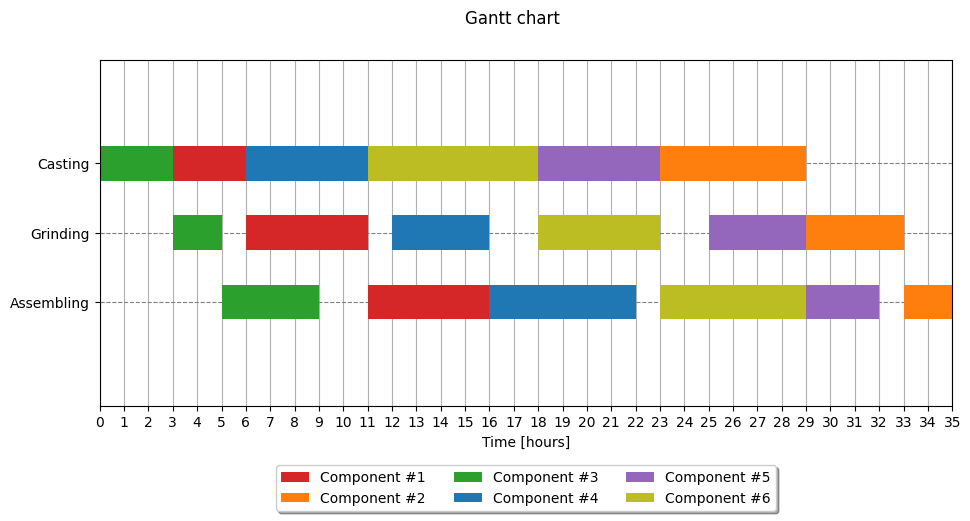

In [ ]:
# ========================================
#              VISUALIZATION 
# ========================================
# Create the Gantt chart
fig, gnt = plt.subplots(figsize=(11,5))
fig.suptitle("Gantt chart")
 
# Setting Y-axis limits
gnt.set_ylim(0, 50)
 
# Setting X-axis limits
gnt.set_xlim(0, minimum_time)
 
# Setting labels for x-axis and y-axis
gnt.set_xlabel('Time [hours]')
gnt.set_xticks(range(0, minimum_time+1));
 
# Setting ticks on y-axis
gnt.set_yticks([15, 25, 35])
# Labelling tickes of y-axis
gnt.set_yticklabels(M_names)
 
# Setting graph attribute
gnt.grid(True)
gnt.set_axisbelow(True)
gnt.yaxis.grid(color='gray', linestyle='dashed')

plt.gca().invert_yaxis()

colors = ["red", "orange", "green", "blue", "purple", "olive"]
for i in range(len(J)):
    gnt.broken_barh([(StartTimesCasting[i], DurationsCasting[i])], (12.5, 5),
                    facecolors=(f"tab:{colors[i]}"), label=J_names[i])
    gnt.broken_barh([(StartTimesGrinding[i], DurationsGrinding[i])], (22.5, 5),
                    facecolors=(f"tab:{colors[i]}"))
    gnt.broken_barh([(StartTimesAssembling[i], DurationsAssembling[i])], (32.5, 5),
                    facecolors=(f"tab:{colors[i]}")) 

# Declaring a bar in schedule
gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))
 
# Declaring multiple bars in at same level and same width
gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
                         facecolors ='tab:blue')

# Shrink current axis's height by 10% on the bottom
box = gnt.get_position()
gnt.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
gnt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

fig.show()

( Αξίζει εδώ να σημειωθεί επίσης ότι μπορούν να υπάρξουν και άλλες παραλλαγές του παραπάνω διαγράμματος, διατηρώντας την ίδια σειρά/ranks αλλά με διαφορετικές τιμές των μεταβλητών $wait$ και $empty$, δίνοντας πάλι την ελάχιστη τιμή συνολικού χρόνου επεξεργασίας. )

---
## **Ερώτημα 2o**
### **Προγραμματισμός Παραγωγής Αυτοκινήτων**

#### **Μοντελοποιήση προβλήματος**

Το πρόβλημα αυτό μπορεί να μοντελοποιηθεί ως ένα **Planning** πρόβλημα.

Αρχικά, ορίζουμε τα παρακάτω σύνολα/sets:

*  $CARS = \{1, 2, 3\}$ το οποίο είναι το σύνολο των μοντέλων που παράγει η ΑΥΤΟΚΙΝΗΣΗ Α.Ε., όπου:
    *   Η τιμή 1 αντιστοιχεί στο μοντέλο $Basic$
    *   Η τιμή 2 αντιστοιχεί στο μοντέλο $ShowOff$
    *   Η τιμή 3 αντιστοιχεί στο μοντέλο $Luxurious$
*  $FACTORIES = \{1, 2, 3, 4, 5\}$ το οποίο είναι το σύνολο των γραμμών παραγωγής που δύναται να έχει η ΑΥΤΟΚΙΝΗΣΗ Α.Ε., όπου:
    *   Η τιμή 1 αντιστοιχεί στη γραμμή παραγωγής $Basic$
    *   Η τιμή 2 αντιστοιχεί στη γραμμή παραγωγής $ShowOff$
    *   Η τιμή 3 αντιστοιχεί στη γραμμή παραγωγής $Luxurious$
    *   Η τιμή 4 αντιστοιχεί στη γραμμή παραγωγής $NewBasic$
    *   Η τιμή 5 αντιστοιχεί στη γραμμή παραγωγής $NewShowOff$

Ορίζουμε την δυαδική μεταβλητή απόφασης:

$$
    X_{Basic} = \left\{\begin{array}{ll}
        1, & \textsf{ανν λειτουργεί η γραμμή παραγωγής } Basic\\
        0, & \textsf{αλλιώς}
        \end{array}\right.
$$

, προφανώς με:

$$
    X_{Basic} \in \{0, 1\} \tag{12}
$$

και την

$$
    X_{NewBasic} = \left\{\begin{array}{ll}
        1, & \textsf{ανν λειτουργεί η γραμμή παραγωγής } NewBasic\\
        0, & \textsf{αλλιώς}
        \end{array}\right.
$$

, προφανώς πάλι με:

$$
    X_{NewBasic} \in \{0, 1\} \tag{13}
$$

, όπου, αφού δεν μπορούν να λειτουργούν και οι δύο ταυτόχρρονα, αφού η δεύτερη είναι η πιθανή εκσυγχρόνιση της πρώτης, ισχύει ότι:

$$
    X_{Basic} + X_{NewBasic} = 1 \tag{14}
$$

Ορίζουμε και την δυαδική μεταβλητή απόφασης:

$$
    X_{ShowOff} = \left\{\begin{array}{ll}
        1, & \textsf{ανν λειτουργεί η γραμμή παραγωγής } ShowOff\\
        0, & \textsf{αλλιώς}
        \end{array}\right.
$$

, προφανώς με:

$$
    X_{ShowOff} \in \{0, 1\} \tag{15}
$$

και την

$$
    X_{NewShowOff} = \left\{\begin{array}{ll}
        1, & \textsf{ανν λειτουργεί η γραμμή παραγωγής } NewShowOff\\
        0, & \textsf{αλλιώς}
        \end{array}\right.
$$

, προφανώς πάλι με:

$$
    X_{NewShowOff} \in \{0, 1\} \tag{16}
$$

, όπου, αφού δεν μπορούν να λειτουργούν και οι δύο ταυτόχρονα, αφού η δεύτερη είναι η πιθανή εκσυγχρόνιση της πρώτης, ισχύει ότι:

$$
    X_{ShowOff} + X_{NewShowOff} = 1 \tag{17}
$$

*(Αντί των παραπάνω δύο δυαδικών μεταβλητών, θα μπορούσαμε να ορίσουμε μια πιο γενική μεταβλητή συναρτήση του $j$ που να ορίζει αν λειτουργεί η κάθε γραμμή παραγωγής $j \in FACTORIES$, όμως αποφασίσαμε, για χάρην της αναφοράς και απλότητας, να τις ορίσουμε ξεχωριστά.)*

Για τον προγραμματισμό της παραγωγή του κάθε μοντέλου από κάθε γραμμή παραγωγής, ορίζουμε την διακριτή μεταβλητή απόφασης $n_{i,j} \in \mathbb{Z}$ που αντιστοιχεί στον αριθμό αυτοκινήτων μοντέλου/τύπου $i \in CARS$ που πρέπει να παραχθούν από την γραμμή παραγωγής $j \in FACTORIES$, άρα:

$$
    n_{i,j} \geq 0,\quad\forall i \in CARS,~\forall j \in FACTORIES \tag{18}
$$

Από τον $πίνακα~3$ της εκφώνησης, όμως, μπορούμε να δόυμε ότι κάποιες γραμμές παραγωγής δεν δύναται να παράξουν συγκεκριμένα μοντέλα αυτοκινήτου. Έτσι ορίζουμε τα παρακάτω Production Capability Constraints:

$$
    \begin{align}
        n_{i,1} &= 0,\quad\forall i = 2,3 \nonumber\\
        n_{i,2} &= 0,\quad\forall i = 1,3 \nonumber\\
        n_{i,3} &= 0,\quad\forall i = 1,2 \nonumber\\
        n_{3,4} &= 0 \nonumber
    \nonumber \end{align}\tag{19}
$$

Επίσης, από τον $πίνακα~2$ της εκφώνησης μπορούμε να δούμε ότι κάθε γραμμή παραγωγής έχει συγκεκριμένο άνω όριο για τον συνολικό αριθμό αυτοκινήτων (οποιουδήποτε μοντέλου) που δύναται να παράξει (με την προϋπόθεση βέβαια ότι αυτή η γραμμή παραγωγής λειτουργεί, σύμφωνα με τις δυαδικές μεταβλητές $X$). Έτσι ορίζουμε και τα παρακάτω Production Capacity Constraints:

$$
    \begin{align}
        X_{Basic}\cdot\sum_{i = 1}^{3}n_{i,1} &\leq 1000 \cdot 1000  \nonumber\\
        X_{ShowOff}\cdot\sum_{i = 1}^{3}n_{i,2} &\leq 800 \cdot 1000 \nonumber\\
        \sum_{i = 1}^{3}n_{i,3} &\leq 900 \cdot 1000 \nonumber\\
        X_{NewBasic}\cdot\sum_{i = 1}^{3}n_{i,4} &\leq 1600 \cdot 1000 \nonumber\\
        X_{NewShowOff}\cdot\sum_{i = 1}^{3}n_{i,5} &\leq 1800 \cdot 1000 \nonumber
    \nonumber \end{align}\tag{20}
$$

Για να συνεχίσουμε, ορίζουμε την βοηθητική μεταβλητή απόφασης $carsProd_{i} \in \mathbb{Z}$ που δείχνει τον συνολικό αριθμό παραγώμενων αυτοκινήτων τύπου $i \in CARS$, από όλες τις εν λειτουργία γραμμές παραγωγής. Άρα εύκολα καταλαβαίνουμε και ότι:

$$
    carsProd_{i} \geq 0,\quad\forall i \in CARS \tag{21}
$$

με προφανώς:

$$
    \begin{align}
        carsProd_{1} &= X_{Basic}\cdot n_{1,1} + X_{NewBasic}\cdot n_{1,4} + X_{NewShowOff}\cdot n_{1,5} \nonumber\\
        carsProd_{2} &= X_{ShowOff}\cdot n_{2,2} + X_{NewBasic}\cdot n_{2,4} + X_{NewShowOff}\cdot n_{2,5} \nonumber\\
        carsProd_{3} &= n_{3,3} + X_{NewShowOff}\cdot n_{3,5} \nonumber
    \nonumber \end{align}\tag{22}
$$

Επίσης, εφόσον δεν έχει νοήμα να κατασκευάσουμε αριθμό αυτοκινήτων, για κάθε μοντέλο, μεγαλύτερο από τον αριθμό των εκτιμώμενων πωλήσεων, ορίζουμε τον βοηθητική μεταβλήτη $expectedSales_{i} \in \mathbb{Z}$ που δείχνει τον αναμενόμενο αριθμό πωλήσεων αυτοκινήτων μοντέλου τύπου $i \in CARS$. Σε κάθε περίπτωση μοντέλου, ο αναμενόμενος αριθμός πωλήσεων αυτοκινήτου τύπου $i$ είναι το άθροισμα της εκτιμώμενης ζήτησης (που δίνεται από τον $πίνακα~4$ της εκφώνησης) του και της ζήτησης που προκύπτει από την μεταβολή της ζήτησης από τα υπόλοιπα μοντέλα, λόγω μη ικανοποίησης από αυτά, με συντελέστη που δίνεται από τον $πίνακα~5$ της εκφώνησης. Δηλαδή πρέπει:

$$
    carsProd_{i} \leq expectedSales_{i},\quad\forall i \in CARS \tag{23}
$$

, με

$$
    \begin{align}
        expectedSales_{1} &= 1400 \cdot 1000 \nonumber\\
        expectedSales_{2} &= 1100 \cdot 1000 + 0.3\cdot\left( expectedSales_{1} - carsProd_{1} \right) \nonumber\\
        expectedSales_{3} &= 800 \cdot 1000 + 0.05\cdot\left( expectedSales_{1} - carsProd_{1} \right) + \nonumber\\
                          &\quad + 0.1\cdot\left( expectedSales_{2} - carsProd_{2} \right) \nonumber\\
    \nonumber\end{align}\tag{24}
$$

Στόχος, άρα, είναι να μεγιστοποιηθεί το συνολικό κέρδος της ΑΥΤΟΚΙΝΗΣΗ Α.Ε., το οποίο ταυτίζεται με κέρδος, της κάθε εν λειτουργεία γραμμής παραγωγής, για κάθε μοντέλο που αυτή παράγει, μείον το σταθερό κόστος λειτουργίας της κάθε εν λειτουργεία γραμμής παραγωγής, όπως αυτό δίνεται από τον $πίνακα~2$ της εκφώνησης. Έτσι, η αντικειμενική συνάρτηση είναι:

$$
    \max \quad profit \tag{25}
$$

, όπου

$$
    \begin{align}
        profit =&~ X_{Basic}\cdot\left( 2\cdot 1000\cdot n_{1,1} - 2000 \cdot 1000000 \right)+ \nonumber \\ 
        &+ X_{ShowOff}\cdot\left( 3\cdot 1000\cdot n_{2,2} - 2000 \cdot 1000000 \right) + \nonumber \\
        &+ \left( 5\cdot 1000\cdot n_{3,3} - 2600 \cdot 1000000 \right) + \nonumber \\
        &+ X_{NewBasic}\cdot\left( 2.5\cdot 1000\cdot n_{1,4} + 3\cdot 1000\cdot n_{2,4} - 3400 \cdot 1000000 \right) + \nonumber \\
        &+ X_{NewShowOff}\cdot\left( 2.3\cdot 1000\cdot n_{1,5} + 3.5\cdot 1000\cdot n_{2,5} + 4.8\cdot 1000\cdot n_{3,5} - 3700 \cdot 1000000 \right) \nonumber 
    \nonumber\end{align}\tag{26}
$$

Συνοπτικά, μέσω των περιορισμών/constraints $(12), (13), (14), (15), (16), (17), (18), (19), (20), (21), (22), (23), (24)$ και μέσω της αντικειμενικής συνάρτησης $(25)$ με $(26)$ έχουμε τo πρόβλημα μεγιστοποίησης υπό περιορισμόυς, το όποιο είναι και ένα πρόβλημα ακέραιου προγραμματισμού (integer programming) καθώς όλες οι μεταβλητές απόφασεις είναι ακέραιες.

#### **Υλοποίηση**

In [ ]:
# ========================================
#              DECLARATIONS 
# ========================================
CARS = [1, 2, 3]
CARS_names = ['Basic', 'ShowOff', 'Luxurious']

FACTORIES = [1, 2, 3, 4, 5]
FACTORIES_names = ['Basic', 'ShowOff', 'Luxurious', 'NewBasic', 'NewShowOff']

In [ ]:
exe2_model = gp.Model('Car Manufacturing model')

# ========================================
#               CONSTRAINTS
# ========================================
# Add the constraint (12)
X_Basic = exe2_model.addVar(vtype=GRB.BINARY, name="X_Basic")
# Add the constraint (13)
X_NewBasic = exe2_model.addVar(vtype=GRB.BINARY, name="X_NewBasic")

# Add the constraint (14)
exe2_model.addConstr(X_Basic + X_NewBasic == 1, name='BinConstrBasic')

# Add the constraint (15)
X_ShowOff = exe2_model.addVar(vtype=GRB.BINARY, name="X_ShowOff")
# Add the constraint (16)
X_NewShowOff = exe2_model.addVar(vtype=GRB.BINARY, name="X_NewShowOff")

# Add the constraint (17)
exe2_model.addConstr(X_ShowOff + X_NewShowOff == 1, name='BinConstrShowOff')

n = {}
for i in range(1, len(CARS) + 1):
  for j in range(1, len(FACTORIES) + 1):
    n[(i, j)] = exe2_model.addVar(vtype=GRB.INTEGER, name=f"n_{i}_{j}")

    # Add the constraint (18)
    exe2_model.addConstr(n[(i, j)] >= 0, name=f"constr_n_{i}_{j}")

# Add the constraints (19)
for i in [2, 3]:
  exe2_model.addConstr(n[(i, 1)] == 0, name=f"constr0_n_{i}_{1}")

for i in [1, 3]:
  exe2_model.addConstr(n[(i, 2)] == 0, name=f"constr0_n_{i}_{2}")

for i in [1, 2]:
  exe2_model.addConstr(n[(i, 3)] == 0, name=f"constr0_n_{i}_{3}")

exe2_model.addConstr(n[(3, 4)] == 0, name=f"constr0_n_{3}_{4}")

# Add the constraints (20)
exe2_model.addConstr(X_Basic*gp.quicksum(n[(i,1)] for i in range(1, 4)) <= 1000*1000, name="constr0_20_1")
exe2_model.addConstr(X_ShowOff*gp.quicksum(n[(i,2)] for i in range(1, 4)) <= 800*1000, name="constr0_20_2")
exe2_model.addConstr(gp.quicksum(n[(i,3)] for i in range(1, 4)) <= 900*1000, name="constr0_20_3")
exe2_model.addConstr(X_NewBasic*gp.quicksum(n[(i,4)] for i in range(1, 4)) <= 1600*1000, name="constr0_20_4")
exe2_model.addConstr(X_NewShowOff*gp.quicksum(n[(i,5)] for i in range(1, 4)) <= 1800*1000, name="constr0_20_5")

carsProd = {}
for i in range(1, len(CARS) + 1):
    carsProd[(i)] = exe2_model.addVar(vtype=GRB.INTEGER, name=f"carsProd{i}")

    # Add the constraint (21)
    exe2_model.addConstr(carsProd[(i)] >= 0, name=f"carsProd_pos_constr{i}")

 # Add the constraints (22)
exe2_model.addConstr(carsProd[(1)] == X_Basic*n[(1,1)] + X_NewBasic*n[(1,4)] + X_NewShowOff*n[(1,5)], name="constr0_22_1")
exe2_model.addConstr(carsProd[(2)] == X_ShowOff*n[(2,2)] + X_NewBasic*n[(2,4)] + X_NewShowOff*n[(2,5)], name="constr0_22_2")
exe2_model.addConstr(carsProd[(3)] == n[(3,3)] + X_NewShowOff*n[(3,5)], name="constr0_22_3")

expectedSales = {}
for i in range(1, len(CARS) + 1):
    expectedSales[(i)] = exe2_model.addVar(vtype=GRB.INTEGER, name=f"expectedSales{i}")

     # Add the constraint (23)
    exe2_model.addConstr(expectedSales[(i)] >= carsProd[(i)], name=f"expectedSales{i}_constr")

 # Add the constraint (24)
exe2_model.addConstr(expectedSales[(1)] == 1400*1000, name="expectedSales1_equal_constr")
exe2_model.addConstr(expectedSales[(2)] == 1100*1000 + 0.3*(expectedSales[(1)] - carsProd[(1)]),
                     name="expectedSales2_equal_constr")
exe2_model.addConstr(expectedSales[(3)] == 800*1000 + 0.05*(expectedSales[(1)] - carsProd[(1)]) +\
                     0.1*(expectedSales[(2)] - carsProd[(2)]), name="expectedSales2_equal_constr")

# ========================================
#           OBJECTIVE FUNCTION
# ========================================
exe2_model.setObjective(X_Basic*(2*1000*n[(1,1)] - 2000*1000000) \
                        + X_ShowOff*(3*1000*n[(2,2)] - 2000*1000000) \
                        + (5*1000*n[(3,3)] - 2600*1000000) \
                        + X_NewBasic*(2.5*1000*n[(1,4)] + 3*1000*n[(2,4)] - 3400*1000000) \
                        + X_NewShowOff*(2.3*1000*n[(1,5)] + 3.5*1000*n[(2,5)] + 4.8*1000*n[(3,5)] - 3700*1000000),\
                        GRB.MAXIMIZE)

In [ ]:
exe2_model.update()

exe2_model.setParam('OutputFlag', 0)
exe2_model.optimize()

In [ ]:
# ========================================
#                 OUTPUT 
# ========================================
if exe2_model.status == GRB.OPTIMAL:
    print("Optimal Solution found!\n\n")

    if X_Basic.X == 1:
      print("Basic should NOT be upgrated!")
    else:
      print("Basic should be upgraded to NewBasic!")
    
    if X_ShowOff.X == 1:
      print("ShowOff should NOT be upgrated!")
    else:
      print("ShowOff should be upgraded to NewShowOff!")

    n = exe2_model.getAttr('X', n)
    print()
    for j in range(len(FACTORIES)):
      for i in range(len(CARS)):
        if n[i+1, j+1] != 0:
          print(FACTORIES_names[j], "must produce", round(n[i+1, j+1]), "cars of type", CARS_names[i])  
    
    print("The profit is: ", round(exe2_model.getObjective().getValue()), "\u20ac")
    
elif exe2_model.status == GRB.INFEASIBLE:
    print("Model was proven to be infeasible.")
elif exe2_model.status == GRB.INF_OR_UNBD:
    print("Model was proven to be either infeasible or unbounded")
elif exe2_model.status == GRB.UNBOUNDED:
    print("Model was proven to be unbounded")
else:
    print("( Status code:", exe2_model.status, ")")

Optimal Solution found!


Basic should be upgraded to NewBasic!
ShowOff should NOT be upgrated!

ShowOff must produce 800000 cars of type ShowOff
Luxurious must produce 807143 cars of type Luxurious
NewBasic must produce 1257150 cars of type Basic
NewBasic must produce 342850 cars of type ShowOff
The profit is:  2607140000 €


Επομένως, θα συμβουλέψουμε την ΑΥΤΟΚΙΝΗΣΗ Α.Ε., με γνώμονα την μεγιστοποίηση του κέρδους της, ότι:
*   **ΠΡΕΠΕΙ** να εκσυγχρονίσει την γραμμή παραγωγής από $Basic$ σε $NewBasic$
*   **ΔΕΝ ΠΡΕΠΕΙ** να εκσυγχρονίσει την γραμμή παραγωγής από $ShowOff$ σε $NewShowOff$

ενώ ο προτεινόμενος προγραμματισμός της παραγωγής των μοντέλων της για το επόμενο έτος φαίνεται στον παρακάτω πίνακα:

| Γραμμή παραγωγής | Αριθμός Basic οχημάτων | Αριθμός ShowOff οχημάτων | Αριθμός Luxurious οχημάτων |
| ----------- | ----------- | ----------- | ----------- |
| NewBasic    | 1257150     | 342850      |      -      |
| ShowOff     |      -      |  800000     |      -      |
| Luxurious   |      -      |      -      |  807143     |

(Όπου υπάρχουν (*-*), στον παραπάνω πίνακα, σημαίνει ότι η αντίστοιχη γραμμή παραγωγής δεν δύναται να παράξει τον συγκεκριμένο τύπο οχήματος.)

Το **μέγιστο** συνολικό κέρδος έτσι θα είναι `2607140000 €`

---
## **ΒΙΒΛΙΟΓΡΑΦΙΚΕΣ ΑΝΑΦΟΡΕΣ**
[1] "Documentation." Gurobi Optimization, 24 Aug. 2022, www.gurobi.com/documentation/.    